Author: Sean Tulin
<br>
Date: Mar. 21, 2022
<br>
PHYS 2030 W22

# <font color=#46769B>Lesson 12: Fourier series</font>

## <font color=#46769B>Introduction</font>

Any (reasonably well-behaved) periodic function can be represented as a sum of sine and cosine functions. This sum is known as a __Fourier series__. Suppose we have a function $f(t)$, which is periodic with period $T$. Then we can express $f(t)$ as

$$f(t) = a_0 + \sum_{n=1}^{\infty} \big( a_n \cos\left( 2\pi n t/T \right) + b_n \sin\left( 2\pi n t/T \right) \big) , \qquad (1)$$

where $n$ is a non-negative integer, and $a_n$ and $b_n$ are numerical constants, known as __Fourier coefficients__, each of which depends on the index $n$. What does it mean to be a periodic function? Simply put, $f(t)$ repeats every interval $T$, so $f(t) = f(t + T) = f(t + 2T) = f(t + 3T)$, etc. It is clear that the right-hand side also repeats every interval $T$ since cosine and sine repeat for every multiple of $2\pi$.

It is beyond the scope of this course to prove Eq. (1). 
However, let's emphasize why this is an important result. Suppose we want to solve for the respose of a system for a given input (driving function). For linear systems like the harmonic oscillator, responses are *additive*. Say we have input $f_1(t)$ that causes response $y_1(t)$ and input $f_2(t)$ that causes response $y_2(t)$. Then the combined input $f_1(t) + f_2(t)$ causes a total response $y_1(t) + y_2(t)$. So, if we can calculate the response for over a convenient basis that spans all possible inputs $f_1(t)$, $f_2(t)$, etc., then we have comepletely solved the problem for any *arbitrary* input. 

For periodic inputs, sines and cosines are natural basis to work with. If we can solve for the response for sinusoidal functions, then we can solve for the response to *any* periodic function. 

It is best to see how Fourier series works with a few examples. 


## <font color=#46769B>Example: Square wave</font>

The square wave is defined as follows:

$$f(t) = \left\{ \begin{array}{cc} 1 & {\rm for} \; 0 \le  t < \tfrac{T}{2} \\ 0 & {\rm for} \; \tfrac{T}{2} \le t < T \end{array} \right.$$

This is defined for one period only, $0 \le t < T$, and the function is repeated beyond that.

We can define and plot the square wave here. (We set $T=1$.) Let's explain a few piece of the code below:
- The function `square_wave` takes as input one number for `t` and returns either `0` or `1`. First, it checks that it falls within either of the intervals $0 \le  t < \tfrac{T}{2}$ or $\tfrac{T}{2} \le t < T$, returning $1$ or $0$, respectively. But if $t$ is either below or above these intervals, the function will add or subtract $T$ to $t$ and call itself again recursively.
- I know that `numpy.arrays` don't play well with `if` statements. So, I use a built-in function `numpy.vectorize` that allows me to new function `f` that can operate on `numpy.arrays`. It's as if I wrote a `for` loop that went through the `numpy.array` and acted on each element. (See documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html).)



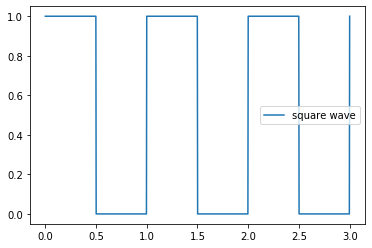

In [63]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,3,num=1000)
T = 1

def square_wave(t):
    if (t >= 0) & (t < T/2):
        return 1
    elif (t >= T/2) & (t < T):
        return 0
    elif t < 0:
        # Shift t up by one period
        return square_wave(t+T)
    else:
        # Shift t down by one period
        return square_wave(t-T)
    
f = np.vectorize(square_wave)

plt.plot(t,f(t),label='square wave')
plt.legend()
plt.show()


Now, let's see how to represent the square wave as a Fourier series. We need to know the Fourier coefficients $a_n$ and $b_n$. They are:

$$a_n = \left\{ \begin{array}{cc} \frac{1}{2} & {\rm for} \; n = 0 \\
0 & {\rm for} \; n > 0 \end{array} \right.$$

$$b_n = \left\{ \begin{array}{cc} \frac{2}{\pi n} & {\rm for\; odd} \; n > 0 \\ 0 & {\rm for\; even} \; n > 0 \end{array} \right.$$

We will derive these below, but for now let's see how the terms in the Fourier series add together to give the square wave.

In principle, we need to sum over an infinite number of terms in the Fourier series, which we cannot do in practice. We have to truncate the sum at some maximum value $n_{\rm max}$, which is an approximation. Here we write a function to calculate the Fourier series as a function of $n_{\rm max}$. You can explore the code below and try different values for $n_{\rm max}$.

Note because the square wave is a discontinuous function, the Fourier series exhibits a "ringing" effect known as [Gibbs' phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

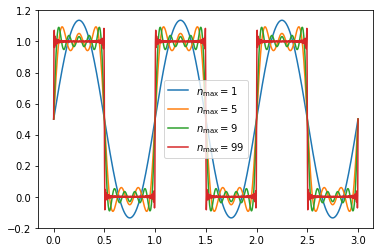

In [92]:
def Fourier_series(t,n_max):
    
    # First term (constant) in Fourier series
    a0 = 1/2
    f = a0
    
    # Sum over n > 0 terms in Fourier series
    for n in range(1,n_max+1,2):
        an = 0
        bn = 2/(np.pi*n)
        f = f + an*np.cos(2*np.pi*n*t/T) + bn*np.sin(2*np.pi*n*t/T)
        
    return f
    
plt.plot(t,Fourier_series(t,1),label=r'$n_{\rm max}=1$')
plt.plot(t,Fourier_series(t,5),label=r'$n_{\rm max}=5$')
plt.plot(t,Fourier_series(t,9),label=r'$n_{\rm max}=9$')
plt.plot(t,Fourier_series(t,99),label=r'$n_{\rm max}=99$')

plt.legend()
plt.show()    

## <font color=#46769B>Derivation of Fourier coefficients</font>

How do we find the Fourier coefficients $a_n$ and $b_n$? For completeness, let's describe the procedure to calculate them.

### <font color=#46769B>Useful integrals</font>

First, I need to know several integral formulas, where $m,n$ are positive integers:

$$\frac{1}{T} \int_0^T dt \, \cos(2\pi m t/T) = 0 \qquad (2)$$

$$\frac{1}{T} \int_0^T dt \, \sin(2\pi m t/T) = 0 \qquad (3)$$

$$\frac{1}{T} \int_0^T dt \, \cos(2\pi n t/T) \cos(2\pi m t/T) = \delta_{mn} \qquad (4)$$

$$\frac{1}{T} \int_0^T dt \, \sin(2\pi n t/T) \sin(2\pi m t/T) = \delta_{mn} \qquad (5)$$

$$\frac{1}{T} \int_0^T dt \, \sin(2\pi n t/T) \cos(2\pi m t/T) = 0 \qquad (6)$$

where the quantity $\delta_{mn}$ is the __Kronecker delta__, defined as

$$\delta_{mn} = \left\{ \begin{array}{cc} 1 & m=n \\ 0 & m \ne n \end{array} \right. .$$ 

Eqs. (2) and (3) are straightforward to prove. To prove the remaining relations, it is useful to consider complex exponentials instead of sines and cosines. We can use Euler's formula

$$e^{i \theta} = \cos\theta + i \sin\theta$$

to write

$$\cos\theta = \frac{1}{2} \left( e^{i \theta} + e^{-i \theta}\right) , \quad \sin\theta = \frac{1}{2i} \left( e^{i \theta} - e^{-i \theta}\right) \, .$$

Now, for example, the integral in Eq. (4) is

$$\frac{1}{2T} \int_0^T dt \, \left( e^{2\pi i n t/T} + e^{-2\pi i n t/T}\right)\left( e^{2\pi i m t/T} + e^{-2\pi i m t/T}\right) = \frac{1}{2T} \int_0^T dt \, \left( e^{2\pi i (n+m) t/T} + e^{2\pi i (m-n) t/T} + e^{2\pi i (n-m) t/T} + e^{-2\pi i  (n+m) t/T}\right) \, .$$

We have four terms to integrate. The first and last are

$$\int_0^T dt \, e^{\pm 2\pi i (n+m) t/T} = \frac{T}{\pm 2\pi i (n+m)} \left( e^{\pm 2\pi i (n+m)} - 1 \right) = 0 \, .$$

A similar calculation also yields zero for the second and third terms *except* when $n=m$, in which case we have

$$\int_0^T dt \, e^{\pm 2\pi i (m-n) t/T} = \int_0^T dt = T \, .$$

Thus, we have for the four integrals in Eq. (4):

$$\frac{1}{T} \int_0^T dt \, \cos(2\pi n t/T) \cos(2\pi m t/T) = \frac{1}{2T} \left( 0 + \tfrac{T}{2} \delta_{mn} + \tfrac{T}{2} \delta_{mn} + 0 \right) = \delta_{mn}$$.

Eqs. (5) and (6) can be derived similarly.


### <font color=#46769B>Fourier's trick</font>

Now, we can obtain the Fourier coefficients through a process known as __Fourier's trick__. The trick is to take various integrals of Eq. (1) to *project out* each Fourier coefficient.

1. Get $a_0$:
$$\frac{1}{T} \int_0^T dt \, f(t) = \frac{1}{T} \int_0^T dt \,  \left[ a_0 + \sum_{n=1}^{\infty} \big( a_n \cos\left( 2\pi n t/T \right) + b_n \sin\left( 2\pi n t/T \right) \big) \right] = a_0$$
where the expression in square brackets is the Fourier series in Eq. (1). According to Eqs. (2) and (3), only the constant $a_0$ survives in the integral.

2. Get $a_m$ ($m>0$):
$$\frac{1}{T} \int_0^T dt \, \cos(2\pi m t/T) \, f(t) = \frac{1}{T} \int_0^T dt \, \cos(2\pi m t/T) \,  \left[ a_0 + \sum_{n=1}^{\infty} \big( a_n \cos\left( 2\pi n t/T \right) + b_n \sin\left( 2\pi n t/T \right) \big) \right] = a_m \, .$$
According to Eqs. (4) and (6), only one term in the Fourier series, $a_n$ with $n=m$, survives in the integral.

3. Get $b_m$ ($m>0$):
$$\frac{1}{T} \int_0^T dt \, \sin(2\pi m t/T) \, f(t) = \frac{1}{T} \int_0^T dt \, \sin(2\pi m t/T) \,  \left[ a_0 + \sum_{n=1}^{\infty} \big( a_n \cos\left( 2\pi n t/T \right) + b_n \sin\left( 2\pi n t/T \right) \big) \right] = b_m\, .$$
According to Eqs. (5) and (6), only one term in the Fourier series, $b_n$ with $n=m$, survives in the integral.

### <font color=#46769B>Summary</font>

Now that we have gone through all the derivation, let's summarize the formulas for calculating Fourier coefficients. (We relabel $m \to n$.)

$$a_0 = \frac{1}{T} \int_0^T dt \, f(t)$$

$$a_n = \frac{1}{T} \int_0^T dt \, \cos(2\pi n t/T) \, f(t)$$

$$b_n = \frac{1}{T} \int_0^T dt \, \sin(2\pi n t/T) \, f(t)$$

Note that the constant piece $a_0$ is just the mean value of $f(t)$. It is an exercise to the reader to derive the Fourier coefficients for the square wave given above.
